In [ ]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import preprocessing

In [ ]:
data = pd.read_csv('ML_data.csv')
data


,Metal,Atomic Number,Atomic radius,Ionic Radius (A),Electrons in outer shell,No. of shells,Valance electron,Electron affinity (kJ /mol),Electronegativity,Melting point C,...,Adsorbate Ionic Radius,Adsorbate Electron in outer shell,Adsorbate Electron Affinity,Adsorbate Electronegativity,Adsorbate Boiling Point (C),Adsorbate Melting point( C),Boiling point C,Adsorbte Heat of Fusion (kJ/mol),Adsorbater Heat of vapourisation (kJ/mol),Binding Energy
0,Co,27,1.52,0.65,2,4,4,63.7,1.88,1495.0,...,0.16,4,153.9,2.55,4027.00,3550.00,4027.00,105.000,715.000,0.247810
1,Fe,26,1.56,1.72,8,4,3,15.7,1.83,1538.0,...,0.16,4,153.9,2.55,4027.00,3550.00,4027.00,105.000,715.000,-0.663160
2,Ir,77,1.80,0.63,2,6,6,151.0,2.20,2466.0,...,0.16,4,153.9,2.55,4027.00,3550.00,4027.00,105.000,715.000,-0.209200
3,Ni,28,1.49,1.72,2,4,2,112.0,1.91,1455.0,...,0.16,4,153.9,2.55,4027.00,3550.00,4027.00,105.000,715.000,0.451360
4,Pd,46,1.69,0.63,10,5,4,53.7,2.20,1554.9,...,0.16,4,153.9,2.55,4027.00,3550.00,4027.00,105.000,715.000,0.273978
5,Pt,78,1.77,0.69,1,6,6,205.3,2.28,1768.3,...,0.16,4,153.9,2.55,4027.00,3550.00,4027.00,105.000,715.000,-0.074410
6,Rh,45,1.73,0.67,9,5,6,109.7,2.28,1964.0,...,0.16,4,153.9,2.55,4027.00,3550.00,4027.00,105.000,715.000,-0.178650
7,Ru,44,1.78,0.62,1,5,6,101.3,2.20,2334.0,...,0.16,4,153.9,2.55,4027.00,3550.00,4027.00,105.000,715.000,-0.415280
8,Co,27,1.52,0.65,2,4,4,63.7,1.88,1495.0,...,1.40,6,141.0,3.44,-182.90,-218.30,-182.90,0.220,3.140,-0.547220
9,Fe,26,1.56,1.72,8,4,3,15.7,1.83,1538.0,...,1.40,6,141.0,3.44,-182.90,-218.30,-182.90,0.220,3.140,-1.105190


In [ ]:
#sns.pairplot(data)


In [ ]:
data_cleaned = data.dropna()
data_cleaned


,Metal,Atomic Number,Atomic radius,Ionic Radius (A),Electrons in outer shell,No. of shells,Valance electron,Electron affinity (kJ /mol),Electronegativity,Melting point C,...,Adsorbate Ionic Radius,Adsorbate Electron in outer shell,Adsorbate Electron Affinity,Adsorbate Electronegativity,Adsorbate Boiling Point (C),Adsorbate Melting point( C),Boiling point C,Adsorbte Heat of Fusion (kJ/mol),Adsorbater Heat of vapourisation (kJ/mol),Binding Energy
0,Co,27,1.52,0.65,2,4,4,63.7,1.88,1495.0,...,0.16,4,153.9,2.55,4027.00,3550.00,4027.00,105.000,715.000,0.247810
1,Fe,26,1.56,1.72,8,4,3,15.7,1.83,1538.0,...,0.16,4,153.9,2.55,4027.00,3550.00,4027.00,105.000,715.000,-0.663160
2,Ir,77,1.80,0.63,2,6,6,151.0,2.20,2466.0,...,0.16,4,153.9,2.55,4027.00,3550.00,4027.00,105.000,715.000,-0.209200
3,Ni,28,1.49,1.72,2,4,2,112.0,1.91,1455.0,...,0.16,4,153.9,2.55,4027.00,3550.00,4027.00,105.000,715.000,0.451360
4,Pd,46,1.69,0.63,10,5,4,53.7,2.20,1554.9,...,0.16,4,153.9,2.55,4027.00,3550.00,4027.00,105.000,715.000,0.273978
5,Pt,78,1.77,0.69,1,6,6,205.3,2.28,1768.3,...,0.16,4,153.9,2.55,4027.00,3550.00,4027.00,105.000,715.000,-0.074410
6,Rh,45,1.73,0.67,9,5,6,109.7,2.28,1964.0,...,0.16,4,153.9,2.55,4027.00,3550.00,4027.00,105.000,715.000,-0.178650
7,Ru,44,1.78,0.62,1,5,6,101.3,2.20,2334.0,...,0.16,4,153.9,2.55,4027.00,3550.00,4027.00,105.000,715.000,-0.415280
8,Co,27,1.52,0.65,2,4,4,63.7,1.88,1495.0,...,1.40,6,141.0,3.44,-182.90,-218.30,-182.90,0.220,3.140,-0.547220
9,Fe,26,1.56,1.72,8,4,3,15.7,1.83,1538.0,...,1.40,6,141.0,3.44,-182.90,-218.30,-182.90,0.220,3.140,-1.105190


In [ ]:
data_cleaned.columns

Index(['Metal', 'Atomic Number ', 'Atomic radius', 'Ionic Radius (A)',
       'Electrons in outer shell', 'No. of shells ', 'Valance electron',
       'Electron affinity (kJ /mol)', 'Electronegativity', 'Melting point C',
       'Boiling point (C)', 'Heat of Fusion (kJ/mol)',
       ' Heat of vapourisation (kJ/mol)', 'Adsorbate type',
       'Adsorbate Atomic radius', 'Adsorbate Atomic Number ',
       'Adsorbate Ionic Radius', 'Adsorbate Electron in outer shell',
       'Adsorbate Electron Affinity', 'Adsorbate Electronegativity',
       'Adsorbate Boiling Point (C)', 'Adsorbate Melting point( C)',
       'Boiling point C', 'Adsorbte Heat of Fusion (kJ/mol)',
       'Adsorbater Heat of vapourisation (kJ/mol)', 'Binding Energy'],
      dtype='object')

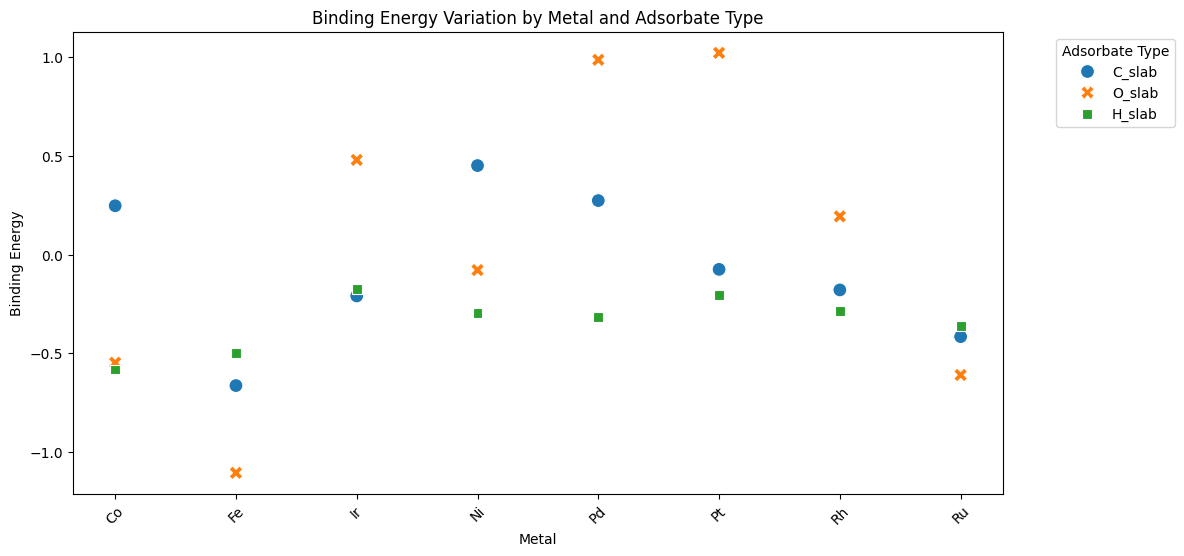

In [ ]:
    plt.figure(figsize=(12, 6))

    # Scatterplot: x = Metal, y = Binding Energy, hue & style = Adsorbate type
    sns.scatterplot(data=data, x='Metal', y='Binding Energy', hue='Adsorbate type', style='Adsorbate type', s=100)

    plt.xticks(rotation=45)
    plt.xlabel("Metal")
    plt.ylabel("Binding Energy")
    plt.title("Binding Energy Variation by Metal and Adsorbate Type")
    plt.legend(title="Adsorbate Type", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()

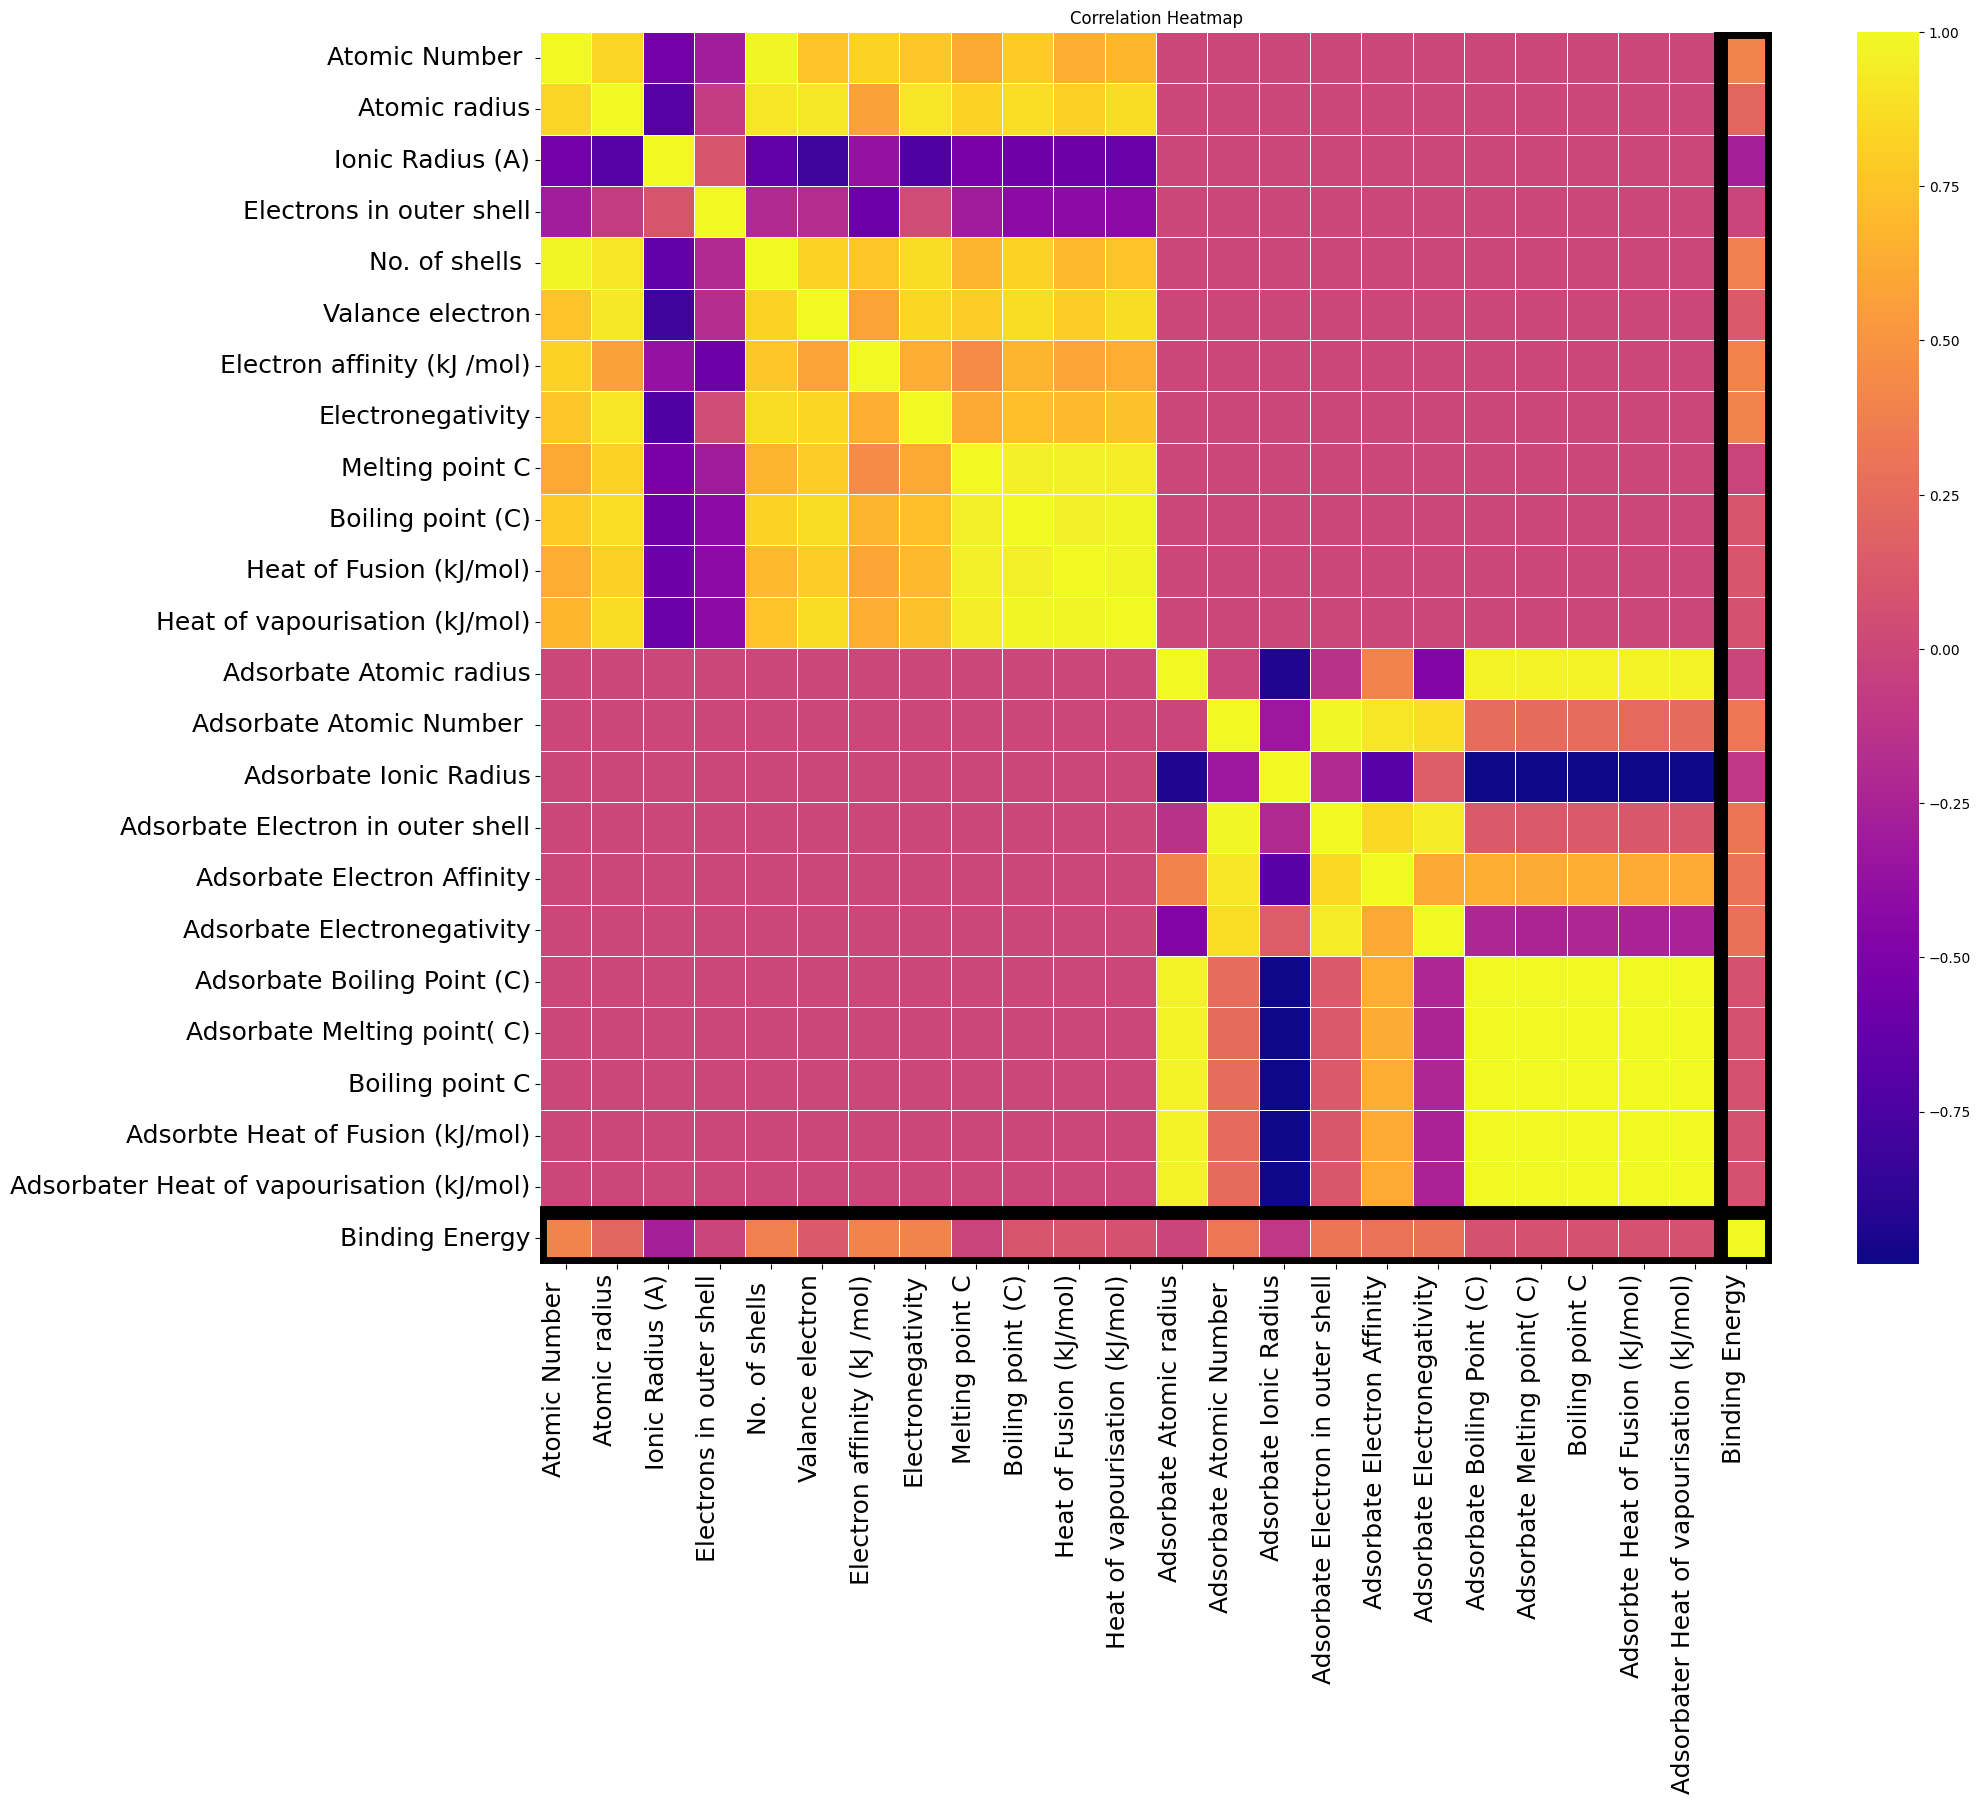

In [ ]:
corr_data = data.drop(columns=['Metal', 'Adsorbate type'], errors='ignore').copy()

# Compute correlation matrix
corr_matrix = corr_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(22, 16))
sns.heatmap(corr_matrix, annot=False, cmap="plasma", fmt=".2f", linewidths=0.5,cbar=True, square=True ,annot_kws={"size": 40})
plt.title("Correlation Heatmap")
col_index = corr_matrix.columns.get_loc('Binding Energy')
plt.gca().add_patch(plt.Rectangle((col_index, 0), 1, corr_matrix.shape[0],
                                      fill=False, edgecolor='black', lw=10))
plt.gca().add_patch(plt.Rectangle((0, col_index), corr_matrix.shape[1], 1,
                                      fill=False, edgecolor='black', lw=10))
plt.xticks(fontsize=18,  ha='right')  # Rotate and increase x-axis labels
plt.yticks(fontsize=18)
plt.show()

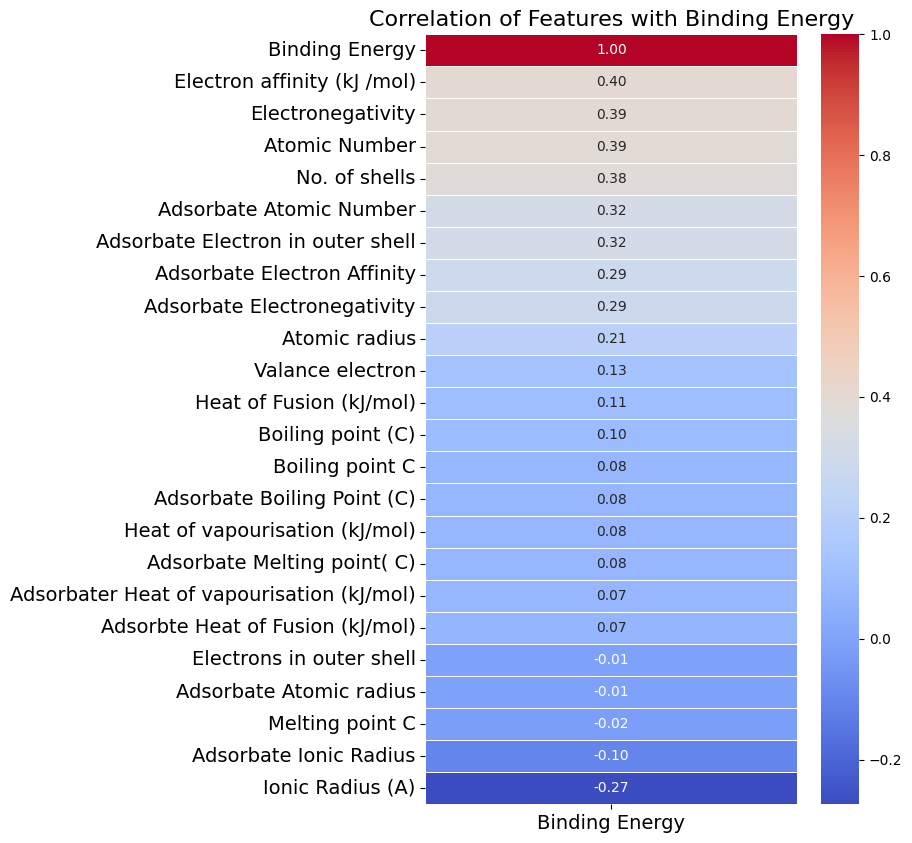

In [ ]:
data.columns = data.columns.str.strip()

# Create a copy and drop 'Metal' and 'Adsorbate type' columns
corr_data = data.drop(columns=['Metal', 'Adsorbate type'], errors='ignore').copy()

corr_matrix = corr_data.corr()

# Extract only the "Binding Energy" correlations
if "Binding Energy" in corr_matrix.columns:
    binding_energy_corr = corr_matrix[['Binding Energy']].sort_values(by='Binding Energy', ascending=False)

    # Plot heatmap for Binding Energy correlations
    plt.figure(figsize=(6, 10))  # Adjust size for better visibility
    sns.heatmap(binding_energy_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar=True)

    # Increase font size
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14, rotation=0)
    plt.title("Correlation of Features with Binding Energy", fontsize=16)

    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_regression(y_test, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    sns.regplot(x=y_test, y=y_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
    plt.xlabel("Actual Values (y_test)")
    plt.ylabel("Predicted Values (y_pred)")
    plt.title(f"Regression Plot: {model_name}")
    plt.grid(True)
    plt.show()

**Applying KNN**


In [ ]:
X = data_cleaned.drop(columns=['Metal', 'Adsorbate type', 'Binding Energy'])
y = data_cleaned['Binding Energy']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=6)

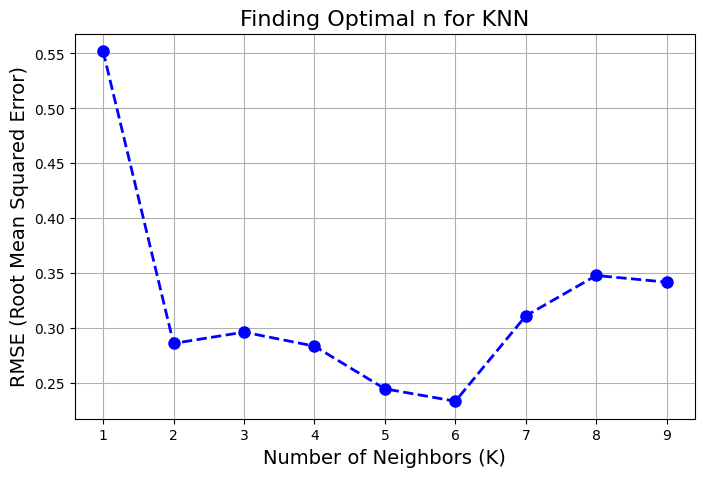

In [ ]:
from sklearn.metrics import mean_squared_error

errors = []
K_range = range(1, 10)  # Try K from 1 to 20

for k in K_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    errors.append(rmse)

# Plot RMSE vs. K
plt.figure(figsize=(8, 5))
plt.plot(K_range, errors, marker='o', linestyle='--', color='b', markersize=8, linewidth=2)
plt.xlabel('Number of Neighbors (K)', fontsize=14)
plt.ylabel('RMSE (Root Mean Squared Error)', fontsize=14)
plt.title('Finding Optimal n for KNN', fontsize=16)
plt.grid()

In [ ]:
y_pred = knn.predict(X_test_scaled)
y_pred


array([-0.01928267, -0.209416  , -0.11338489, -0.03186022, -0.20657489])

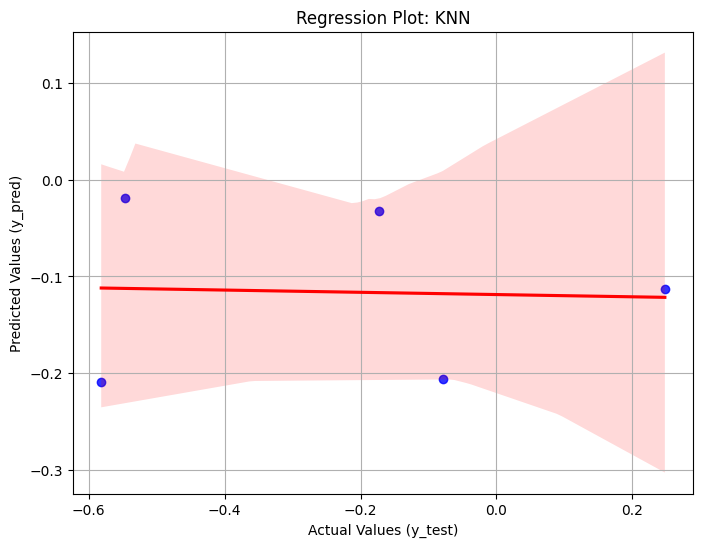

In [ ]:
plot_regression(y_test, y_pred, "KNN")

In [ ]:
comparison_table = pd.DataFrame({
    'Actual (y_test)': y_test.values,
    'Predicted (y_pred)': y_pred
})
comparison_table.reset_index(drop=True)

,Actual (y_test),Predicted (y_pred)
0,-0.54722,-0.019283
1,-0.58157,-0.209416
2,0.24781,-0.113385
3,-0.17317,-0.031860
4,-0.07809,-0.206575


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Square Error (RMSE):", rmse,"eV")

Root Mean Square Error (RMSE): 0.3418054988940239 eV


In [ ]:
rmse_knn = rmse

for training data


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=6)

In [ ]:
y_pred = knn.predict(X_train_scaled)
y_pred

array([-0.230607  ,  0.31180633, -0.28694367,  0.056363  ,  0.069818  ,
       -0.02059867,  0.02854767,  0.285693  , -0.25297533, -0.101027  ,
       -0.26333033, -0.25266067, -0.102289  , -0.21563867, -0.20218367,
        0.08735333,  0.298248  , -0.341947  , -0.21112033])

In [ ]:
comparison_table = pd.DataFrame({
    'Actual (y_test)': y_train.values,
    'Predicted (y_pred)': y_pred
})
comparison_table.reset_index(drop=True)

,Actual (y_test),Predicted (y_pred)
0,-1.105190,-0.230607
1,1.022470,0.311806
2,-0.663160,-0.286944
3,-0.202960,0.056363
4,-0.074410,0.069818
5,-0.209200,-0.020599
6,0.987078,0.028548
7,-0.609540,0.285693
8,0.451360,-0.252975
9,0.273978,-0.101027


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print("Root Mean Square Error (RMSE):", rmse,"eV")

Root Mean Square Error (RMSE): 0.47207568700380753 eV


**Apllying SVR**

In [ ]:
features = data_cleaned.select_dtypes(include=['float64']).drop(columns=['Binding Energy'])
target = data_cleaned['Binding Energy']

In [ ]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf', C=1, epsilon=0.01)
svr_model.fit(X_train_scaled, y_train)

SVR(C=1, epsilon=0.01)

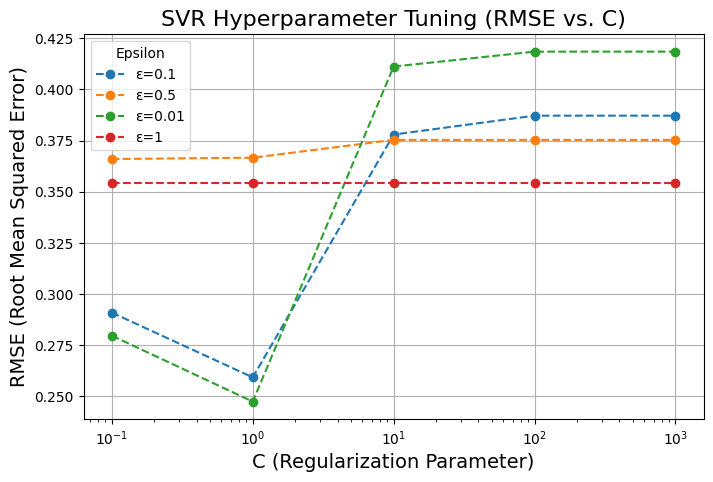

In [ ]:
C_values = [0.1, 1, 10, 100, 1000]  # Regularization parameter
epsilon_values = [0.01, 0.1, 0.5, 1]  # Error tolerance

# Store RMSE results
rmse_results = {}

# Grid search over C and epsilon
for C in C_values:
    for epsilon in epsilon_values:
        svr = SVR(C=C, epsilon=epsilon, kernel='rbf')  # Using RBF kernel
        svr.fit(X_train_scaled, y_train)
        y_pred = svr.predict(X_test_scaled)

        # Compute RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_results[(C, epsilon)] = rmse

# Convert results into arrays for plotting
C_list, epsilon_list, rmse_list = zip(*[(C, epsilon, rmse) for (C, epsilon), rmse in rmse_results.items()])

# Plot RMSE vs. C values (for a fixed epsilon)
plt.figure(figsize=(8, 5))
for eps in set(epsilon_list):
    plt.plot(C_values, [rmse_results[(C, eps)] for C in C_values], marker='o', linestyle='--', label=f'ε={eps}')

plt.xscale('log')  # Log scale for better visualization
plt.xlabel('C (Regularization Parameter)', fontsize=14)
plt.ylabel('RMSE (Root Mean Squared Error)', fontsize=14)
plt.title('SVR Hyperparameter Tuning (RMSE vs. C)', fontsize=16)
plt.legend(title="Epsilon")
plt.grid()
plt.show()

In [ ]:
y_pred = svr_model.predict(X_test_scaled)  # Predict target values
y_pred


array([-0.27374281, -0.3443227 ,  0.10909741, -0.28373872, -0.45662721])

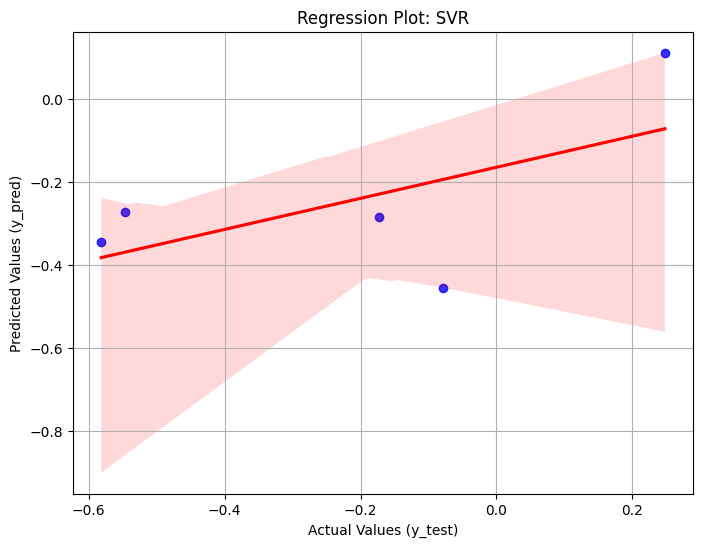

In [ ]:
plot_regression(y_test, y_pred, "SVR")

In [ ]:
comparison_table = pd.DataFrame({
    'Actual (y_test)': y_test.values,
    'Predicted (y_pred)': y_pred,
    'difference ': y_test.values - y_pred
})
comparison_table.reset_index(drop=True)

,Actual (y_test),Predicted (y_pred),difference
0,-0.54722,-0.273743,-0.273477
1,-0.58157,-0.344323,-0.237247
2,0.24781,0.109097,0.138713
3,-0.17317,-0.283739,0.110569
4,-0.07809,-0.456627,0.378537


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 0.2473188606951502


In [ ]:
rmse_svr = rmse

**Applying Random Forest Regression**

In [ ]:
X = data_cleaned.select_dtypes(include=['float64', 'int64']).drop(columns=['Binding Energy'])
y = data_cleaned['Binding Energy']

In [ ]:
X.columns

Index(['Atomic Number ', 'Atomic radius', 'Ionic Radius (A)',
       'Electrons in outer shell', 'No. of shells ', 'Valance electron',
       'Electron affinity (kJ /mol)', 'Electronegativity', 'Melting point C',
       'Boiling point (C)', 'Heat of Fusion (kJ/mol)',
       ' Heat of vapourisation (kJ/mol)', 'Adsorbate Atomic radius',
       'Adsorbate Atomic Number ', 'Adsorbate Ionic Radius',
       'Adsorbate Electron in outer shell', 'Adsorbate Electron Affinity',
       'Adsorbate Electronegativity', 'Adsorbate Boiling Point (C)',
       'Adsorbate Melting point( C)', 'Boiling point C',
       'Adsorbte Heat of Fusion (kJ/mol)',
       'Adsorbater Heat of vapourisation (kJ/mol)'],
      dtype='object')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=500, max_depth=6, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=6, n_estimators=500, random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)
y_pred

array([-0.22467425, -0.36785469, -0.22992924, -0.17859415,  0.22021512])

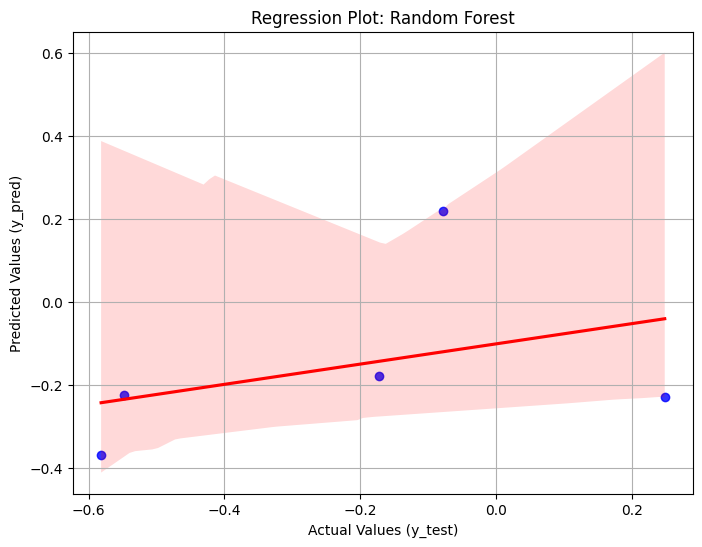

In [ ]:
plot_regression(y_test, y_pred, "Random Forest")

In [ ]:
comparison_table = pd.DataFrame({
    'Actual (y_test)': y_test.values,
    'Predicted (y_pred)': y_pred,
    'Difference':y_pred - y_test.values
})
comparison_table.reset_index(drop=True)

,Actual (y_test),Predicted (y_pred),Difference
0,-0.54722,-0.224674,0.322546
1,-0.58157,-0.367855,0.213715
2,0.24781,-0.229929,-0.477739
3,-0.17317,-0.178594,-0.005424
4,-0.07809,0.220215,0.298305


In [ ]:
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): tf.Tensor(0.09339202786410186, shape=(), dtype=float64)


In [ ]:

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Square Error (RMSE):", rmse,"eV")

Root Mean Square Error (RMSE): 0.3056010927076372 eV


In [ ]:
rmse_rf = rmse


In [ ]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [ ]:
print("\nFeature Importances:\n", feature_importances)


Feature Importances:
                                       Feature  Importance
0                              Atomic Number     0.215081
6                 Electron affinity (kJ /mol)    0.126790
12                    Adsorbate Atomic radius    0.066543
3                    Electrons in outer shell    0.062289
21           Adsorbte Heat of Fusion (kJ/mol)    0.058011
13                   Adsorbate Atomic Number     0.057752
17                Adsorbate Electronegativity    0.054532
10                    Heat of Fusion (kJ/mol)    0.051570
15          Adsorbate Electron in outer shell    0.047299
11             Heat of vapourisation (kJ/mol)    0.044904
9                           Boiling point (C)    0.035129
8                             Melting point C    0.025383
7                           Electronegativity    0.024469
14                     Adsorbate Ionic Radius    0.024367
2                            Ionic Radius (A)    0.021328
1                               Atomic radius    

**Applying extra tree
 regression**

In [ ]:
X = data_cleaned.select_dtypes(include=['float64']).drop(columns=['Binding Energy'])
y = data_cleaned['Binding Energy']

In [ ]:
X.columns

Index(['Atomic radius', 'Ionic Radius (A)', 'Electron affinity (kJ /mol)',
       'Electronegativity', 'Melting point C', 'Heat of Fusion (kJ/mol)',
       'Adsorbate Atomic radius', 'Adsorbate Ionic Radius',
       'Adsorbate Electron Affinity', 'Adsorbate Electronegativity',
       'Adsorbate Boiling Point (C)', 'Adsorbate Melting point( C)',
       'Boiling point C', 'Adsorbte Heat of Fusion (kJ/mol)',
       'Adsorbater Heat of vapourisation (kJ/mol)'],
      dtype='object')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(n_estimators=500, max_depth=4, random_state=42)
etr.fit(X_train, y_train)

ExtraTreesRegressor(max_depth=4, n_estimators=500, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [4, 6, 10, 15, 20, None]}
grid = GridSearchCV(ExtraTreesRegressor(n_estimators=500), param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid.fit(X_train, y_train)
print(grid.best_params_)

{'max_depth': 4}


In [ ]:
y_pred = etr.predict(X_test)
y_pred

array([ 0.24107737, -0.34602284,  0.06648531, -0.26797416,  0.38339891])

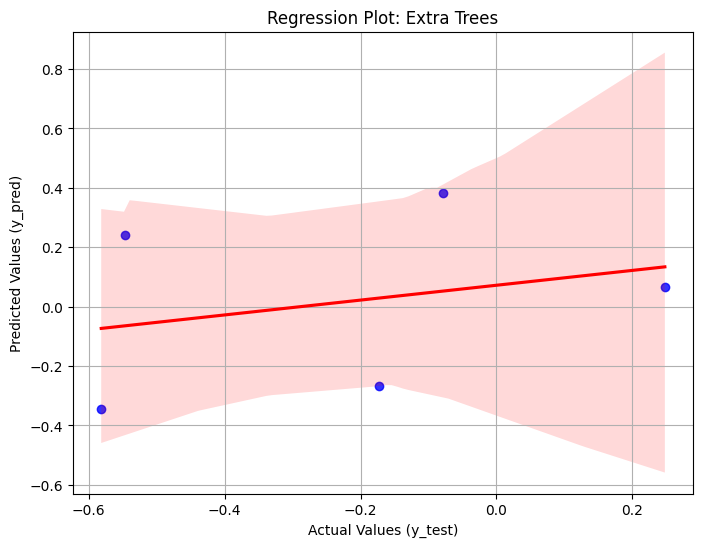

In [ ]:
plot_regression(y_test, y_pred, "Extra Trees")

In [ ]:
comparison_table = pd.DataFrame({
    'Actual (y_test)': y_test.values,
    'Predicted (y_pred)': y_pred
})
comparison_table.reset_index(drop=True)

,Actual (y_test),Predicted (y_pred)
0,-0.54722,0.241077
1,-0.58157,-0.346023
2,0.24781,0.066485
3,-0.17317,-0.267974
4,-0.07809,0.383399


In [ ]:
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): tf.Tensor(0.18634674038993332, shape=(), dtype=float64)


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.4f}")

RMSE: 0.4317


In [ ]:
rmse_etr=rmse

In [ ]:
feature_importances = etr.feature_importances_
important_features = dict(zip(X.columns, feature_importances))

In [ ]:
sorted_features = sorted(important_features.items(), key=lambda x: x[1], reverse=True)
print("Feature Importances:")
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")

Feature Importances:
Adsorbate Electronegativity: 0.1944
Heat of Fusion (kJ/mol): 0.1868
Melting point C: 0.1212
Electron affinity (kJ /mol): 0.1062
Electronegativity: 0.1059
Ionic Radius (A): 0.0858
Adsorbate Atomic radius: 0.0654
Atomic radius: 0.0562
Adsorbate Electron Affinity: 0.0183
Adsorbate Ionic Radius: 0.0139
Adsorbate Boiling Point (C): 0.0121
Adsorbate Melting point( C): 0.0091
Adsorbte Heat of Fusion (kJ/mol): 0.0090
Boiling point C: 0.0085
Adsorbater Heat of vapourisation (kJ/mol): 0.0073


**Apply Gradient Boost Regression**

In [ ]:
X = data_cleaned.select_dtypes(include=['float64']).drop(columns=['Binding Energy'])
y = data_cleaned['Binding Energy']

In [ ]:
X.columns

Index(['Atomic radius', 'Ionic Radius (A)', 'Electron affinity (kJ /mol)',
       'Electronegativity', 'Melting point C', 'Heat of Fusion (kJ/mol)',
       'Adsorbate Atomic radius', 'Adsorbate Ionic Radius',
       'Adsorbate Electron Affinity', 'Adsorbate Electronegativity',
       'Adsorbate Boiling Point (C)', 'Adsorbate Melting point( C)',
       'Boiling point C', 'Adsorbte Heat of Fusion (kJ/mol)',
       'Adsorbater Heat of vapourisation (kJ/mol)'],
      dtype='object')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(learning_rate= 0.01, max_depth= 3, min_samples_leaf= 1, min_samples_split= 10, n_estimators= 100, subsample= 0.8, random_state=42)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, min_samples_split=10,
                          random_state=42, subsample=0.8)

In [ ]:
y_pred = gbr.predict(X_test)
y_pred


array([ 0.19255035, -0.07591159, -0.02020274, -0.13322847,  0.20327083])

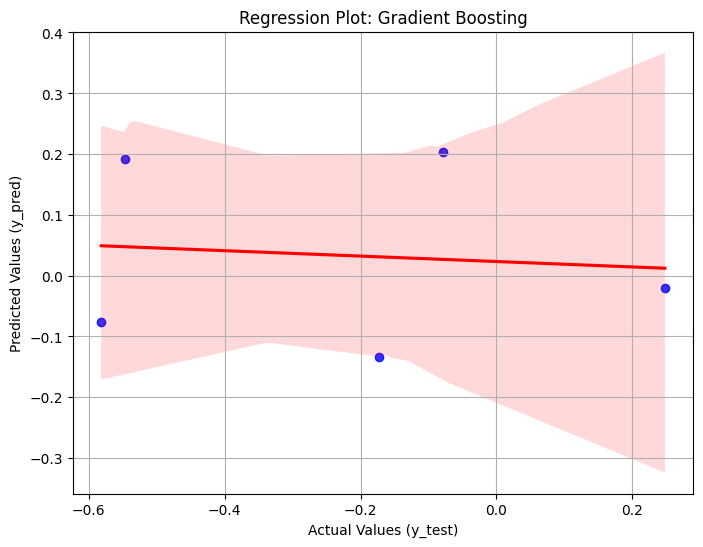

In [ ]:
plot_regression(y_test, y_pred, "Gradient Boosting")

In [ ]:

comparison_table = pd.DataFrame({
    'Actual (y_test)': y_test.values,
    'Predicted (y_pred)': y_pred
})
comparison_table.reset_index(drop=True)

,Actual (y_test),Predicted (y_pred)
0,-0.54722,0.192550
1,-0.58157,-0.075912
2,0.24781,-0.020203
3,-0.17317,-0.133228
4,-0.07809,0.203271


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f" RMSE: {rmse:.4f}")

 RMSE: 0.4372


In [ ]:
rmse_gbr = rmse


In [ ]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.model_selection import GridSearchCV
# import numpy as np

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 300, 500],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.7, 0.8, 1.0],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 3, 5]
# }

# # Initialize GBR model
# gbr = GradientBoostingRegressor(random_state=42)

# # Perform Grid Search
# grid_search = GridSearchCV(gbr, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

# # Print best hyperparameters
# print("Best Parameters:", grid_search.best_params_)

# # Train the best model
# best_gbr = grid_search.best_estimator_

# # Predict and evaluate RMSE
# y_pred = best_gbr.predict(X_test)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print("Optimized RMSE:", rmse)


**Applying XGBoost**

In [ ]:
X = data_cleaned.select_dtypes(include=['float64', 'int64']).drop(columns=['Binding Energy'])
y = data_cleaned['Binding Energy']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=3,
    gamma=0,
    reg_lambda=1,
    reg_alpha=0,
    booster='dart',
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster='dart', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = xgb_model.predict(X_test_scaled)
y_pred

array([-0.75533473, -0.49476776, -0.33899045, -0.39267218,  0.04738995],
      dtype=float32)

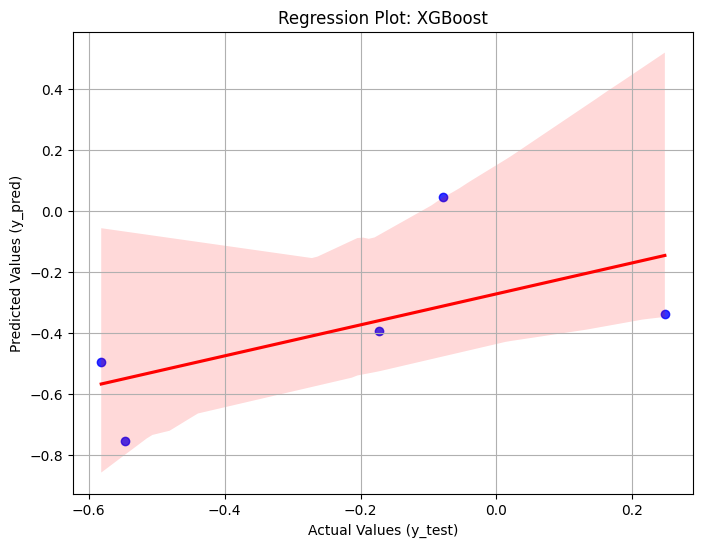

In [ ]:
plot_regression(y_test, y_pred, "XGBoost")

In [ ]:
comparison_table = pd.DataFrame({
    'Actual (y_test)': y_test.values,
    'Predicted (y_pred)': y_pred
})
comparison_table.reset_index(drop=True)

,Actual (y_test),Predicted (y_pred)
0,-0.54722,-0.755335
1,-0.58157,-0.494768
2,0.24781,-0.338990
3,-0.17317,-0.392672
4,-0.07809,0.047390


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"XGBoost RMSE: {rmse:.4f}")

XGBoost RMSE: 0.3030


In [ ]:
rmse_xgb = rmse


In [ ]:
# import numpy as np
# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV

# # Define hyperparameter grid
# param_grid = {
#     'n_estimators': [100, 300, 500],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [3, 6, 10],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'min_child_weight': [1, 5, 10]
# }

# # Initialize XGBoost
# xgb_model = xgb.XGBRegressor(random_state=42)

# # Grid Search
# grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

# # Print Best Parameters
# print("Best Parameters:", grid_search.best_params_)

# # Train Best Model
# best_xgb = grid_search.best_estimator_
# y_pred = best_xgb.predict(X_test)

# # Compute RMSE
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print(f"Optimized XGBoost RMSE: {rmse:.4f}")


grid search

In [ ]:
# import xgboost as xgb
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error

# # ---- Load Data ----
# X = data_cleaned.select_dtypes(include=['float64', 'int64']).drop(columns=['Binding Energy'])
# y = data_cleaned['Binding Energy']

# # Train-Test Split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # ---- Feature Scaling (Optional, Test With & Without) ----
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # ---- Optimized XGBoost Model ----
# xgb_model = xgb.XGBRegressor(
#     n_estimators=1000,
#     learning_rate=0.05,
#     max_depth=8,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     min_child_weight=3,
#     gamma=0,
#     reg_lambda=1,
#     reg_alpha=0,
#     booster='dart',
#     random_state=42
# )

# xgb_model.fit(X_train_scaled, y_train)

# # ---- Predict & Evaluate ----
# y_pred = xgb_model.predict(X_test_scaled)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print(f"Optimized XGBoost RMSE: {rmse:.4f}")


**Applying ANN**

NameError: name 'rfa' is not defined

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
X = data_cleaned.select_dtypes(include=['float64', 'int64']).drop(columns=['Binding Energy'])
y = data_cleaned['Binding Energy']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
# Instead of importing from tensorflow.keras.losses, import directly from tf.keras.losses
from tensorflow import keras  # Import keras
from keras.losses import mean_squared_error

def build_model():
    model = keras.Sequential()
    model.add(keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(1, activation='linear'))  # Linear activation for regression

    # Use mean_squared_error instead of 'mse' string
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
                  loss=mean_squared_error,  # Change here
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

# Define a checkpoint callback to save the best model
checkpoint = ModelCheckpoint(
    'best_model.h5',  # File to save the model
    monitor='val_root_mean_squared_error',  # Monitor validation RMSE
    save_best_only=True,  # Save only the best model
    mode='min',  # We want the minimum RMSE
    verbose=1
)

# Train the model with the checkpoint
model = build_model()
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100, batch_size=32, verbose=1,
    callbacks=[checkpoint]  # Add checkpoint callback
)

# Load the best model after training
# You need to pass the custom_objects argument to load_model when using a custom loss function
best_model = keras.models.load_model('best_model.h5',
                                   custom_objects={'mean_squared_error': mean_squared_error}) # Change here

# Predict and evaluate using the best model
y_pred = best_model.predict(X_test_scaled)
y_pred

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.3604 - root_mean_squared_error: 0.6003
Epoch 1: val_root_mean_squared_error improved from inf to 0.95967, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.3604 - root_mean_squared_error: 0.6003 - val_loss: 0.9210 - val_root_mean_squared_error: 0.9597
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.7924 - root_mean_squared_error: 0.8902
Epoch 2: val_root_mean_squared_error improved from 0.95967 to 0.40720, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.7924 - root_mean_squared_error: 0.8902 - val_loss: 0.1658 - val_root_mean_squared_error: 0.4072
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.2619 - root_mean_squared_error: 0.5118
Epoch 3: val_root_mean_squared_error did not improve from 0.40720
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 0.2619 - root_mean_squared_error: 0.5118 - val_loss: 0.2243 - val_root_mean_squared_error: 0.4736
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1901 - root_mean_squared_error: 0.4360
Epoch 4: val_root_mean_squared_error improved from 0.40720 to 0.32579, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.1901 - root_mean_squared_error: 0.4360 - val_loss: 0.1061 - val_root_mean_squared_error: 0.3258
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1097 - root_mean_squared_error: 0.3312
Epoch 5: val_root_mean_squared_error did not improve from 0.32579
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.1097 - root_mean_squared_error: 0.3312 - val_loss: 0.1230 - val_root_mean_squared_error: 0.3507
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1180 - root_mean_squared_error: 0.3435
Epoch 6: val_root_mean_squared_error did not improve from 0.32579
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.1180 - root_mean_squared_error: 0.3435 - val_loss: 0.1466 - val_root_mean_squared_error: 0.3829
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0753 - root_mean_squared_error: 0.2745
Epoch 7: val_root_mean_squared_error did not improve from 0.32579
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.0753 - root_mean_squared

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - loss: 0.0038 - root_mean_squared_error: 0.0619 - val_loss: 0.1033 - val_root_mean_squared_error: 0.3213
Epoch 19/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0066 - root_mean_squared_error: 0.0810
Epoch 19: val_root_mean_squared_error improved from 0.32133 to 0.31202, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 0.0066 - root_mean_squared_error: 0.0810 - val_loss: 0.0974 - val_root_mean_squared_error: 0.3120
Epoch 20/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0070 - root_mean_squared_error: 0.0834
Epoch 20: val_root_mean_squared_error improved from 0.31202 to 0.30953, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.0070 - root_mean_squared_error: 0.0834 - val_loss: 0.0958 - val_root_mean_squared_error: 0.3095
Epoch 21/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0041 - root_mean_squared_error: 0.0643
Epoch 21: val_root_mean_squared_error did not improve from 0.30953
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 0.0041 - root_mean_squared_error: 0.0643 - val_loss: 0.0968 - val_root_mean_squared_error: 0.3112
Epoch 22/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0023 - root_mean_squared_error: 0.0476
Epoch 22: val_root_mean_squared_error did not improve from 0.30953
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.0023 - root_mean_squared_error: 0.0476 - val_loss: 0.0981 - val_root_mean_squared_error: 0.3133
Epoch 23/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0030 - root_mean_squared_error: 0.0547
Epoch 23: val_root_mean_squared_error did not improve from 0.30953
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.0030 - root_mea

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.0043 - root_mean_squared_error: 0.0653 - val_loss: 0.0916 - val_root_mean_squared_error: 0.3027
Epoch 25/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0041 - root_mean_squared_error: 0.0638
Epoch 25: val_root_mean_squared_error improved from 0.30274 to 0.29506, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.0041 - root_mean_squared_error: 0.0638 - val_loss: 0.0871 - val_root_mean_squared_error: 0.2951
Epoch 26/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0028 - root_mean_squared_error: 0.0531
Epoch 26: val_root_mean_squared_error improved from 0.29506 to 0.29216, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 0.0028 - root_mean_squared_error: 0.0531 - val_loss: 0.0854 - val_root_mean_squared_error: 0.2922
Epoch 27/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0019 - root_mean_squared_error: 0.0437
Epoch 27: val_root_mean_squared_error did not improve from 0.29216
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0019 - root_mean_squared_error: 0.0437 - val_loss: 0.0874 - val_root_mean_squared_error: 0.2956
Epoch 28/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0018 - root_mean_squared_error: 0.0429
Epoch 28: val_root_mean_squared_error did not improve from 0.29216
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0018 - root_mean_squared_error: 0.0429 - val_loss: 0.0925 - val_root_mean_squared_error: 0.3042
Epoch 29/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0021 - root_mean_squared_error: 0.0453
Epoch 29: val_root_mean_squared_error did not improve from 0.29216
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 0.0021 - root_mean_

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([[-0.46058246],
       [-0.2854368 ],
       [ 0.21886893],
       [-0.26737463],
       [-0.6454392 ]], dtype=float32)

In [ ]:
# history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100, batch_size=32, verbose=1)


In [ ]:
y_pred = best_model.predict(X_test_scaled)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[-0.46058246],
       [-0.2854368 ],
       [ 0.21886893],
       [-0.26737463],
       [-0.6454392 ]], dtype=float32)

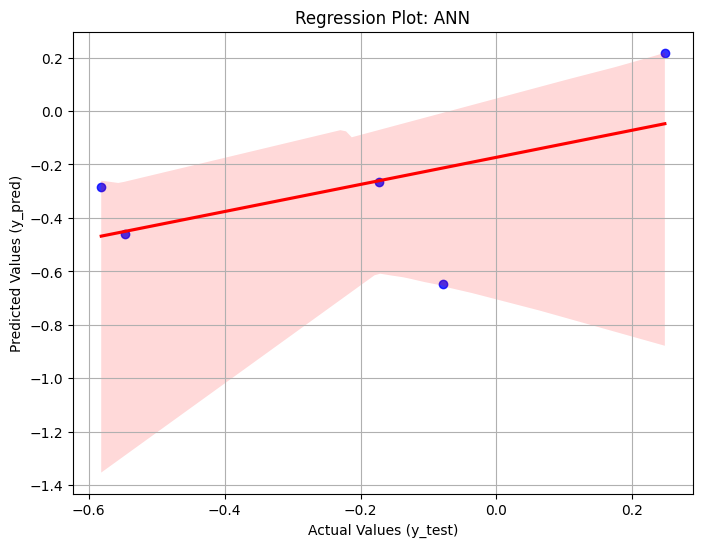

In [ ]:
plot_regression(y_test, y_pred, "ANN")

In [ ]:
comparison_table = pd.DataFrame({
    'Actual (y_test)': y_test.values,
    'Predicted (y_pred)': y_pred.flatten() # Flatten y_pred
})
comparison_table.reset_index(drop=True)

,Actual (y_test),Predicted (y_pred)
0,-0.54722,-0.460582
1,-0.58157,-0.285437
2,0.24781,0.218869
3,-0.17317,-0.267375
4,-0.07809,-0.645439


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"ANN RMSE: {rmse[0]:.4f}") # Access the first element of the rmse array

ANN RMSE: 0.0866


In [ ]:
rmse_ann = rmse


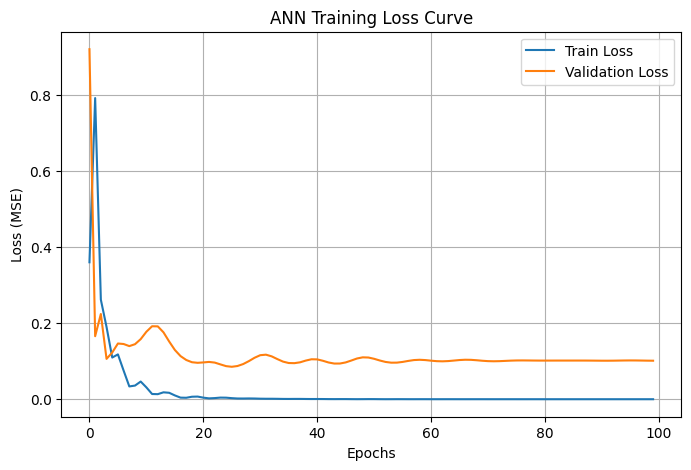

In [ ]:
# Plot Training Loss Curve
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("ANN Training Loss Curve")
plt.legend()
plt.grid()
plt.show()

**ANN2**

In [ ]:
# X = data_cleaned.select_dtypes(include=['float64', 'int64']).drop(columns=['Binding Energy'])
# y = data_cleaned['Binding Energy']


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [ ]:
# def build_model():
#     model = keras.Sequential()

#     # Input Layer + First Hidden Layer with Batch Normalization
#     model.add(keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
#     model.add(keras.layers.BatchNormalization())
#     model.add(keras.layers.Dropout(0.2))  # Dropout to prevent overfitting

#     # Second Hidden Layer
#     model.add(keras.layers.Dense(256, activation='relu'))
#     model.add(keras.layers.BatchNormalization())
#     model.add(keras.layers.Dropout(0.3))  # Higher dropout for deeper layers

#     # Third Hidden Layer
#     model.add(keras.layers.Dense(128, activation='relu'))
#     model.add(keras.layers.BatchNormalization())
#     model.add(keras.layers.Dropout(0.2))

#     # Fourth Hidden Layer
#     model.add(keras.layers.Dense(64, activation='relu'))
#     model.add(keras.layers.BatchNormalization())

#     # Output Layer
#     model.add(keras.layers.Dense(1, activation='linear'))  # Linear activation for regression

#     # Compile Model with Learning Rate Decay
#     initial_learning_rate = 0.01
#     lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#         initial_learning_rate, decay_steps=10000, decay_rate=0.9, staircase=True
#     )
#     optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

#     model.compile(optimizer=optimizer, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
#     return model

# # Define a checkpoint callback to save the best model
# checkpoint = ModelCheckpoint(
#     'best_model.h5',  # File to save the model
#     monitor='val_root_mean_squared_error',  # Monitor validation RMSE
#     save_best_only=True,  # Save only the best model
#     mode='min',  # We want the minimum RMSE
#     verbose=1
# )

# # Train the model with the checkpoint
# model = build_model()
# history = model.fit(
#     X_train_scaled, y_train,
#     validation_data=(X_test_scaled, y_test),
#     epochs=500, batch_size=32, verbose=1,
#     callbacks=[checkpoint]  # Add checkpoint callback
# )

# # Load the best model after training
# best_model = keras.models.load_model('best_model.h5')

# # Predict and evaluate using the best model
# y_pred = best_model.predict(X_test_scaled)

In [ ]:
# # Initialize ANN Model
# model = keras.Sequential()

# # Input Layer + First Hidden Layer with Batch Normalization
# model.add(keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
# model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.Dropout(0.2))  # Dropout to prevent overfitting

# # Second Hidden Layer
# model.add(keras.layers.Dense(256, activation='relu'))
# model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.Dropout(0.3))  # Higher dropout for deeper layers

# # Third Hidden Layer
# model.add(keras.layers.Dense(128, activation='relu'))
# model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.Dropout(0.2))

# # Fourth Hidden Layer
# model.add(keras.layers.Dense(64, activation='relu'))
# model.add(keras.layers.BatchNormalization())

# # Output Layer
# model.add(keras.layers.Dense(1, activation='linear'))  # Linear activation for regression

# # Compile Model with Learning Rate Decay
# initial_learning_rate = 0.01
# lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate, decay_steps=10000, decay_rate=0.9, staircase=True
# )
# optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

# model.compile(optimizer=optimizer, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])


In [ ]:
# # Train the Model
# history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=200, batch_size=32, verbose=1)


In [ ]:
# y_pred = model.predict(X_test_scaled)

In [ ]:
# comparison_table = pd.DataFrame({
#     'Actual (y_test)': y_test.values,
#     'Predicted (y_pred)': y_pred.flatten() # Flatten y_pred
# })
# comparison_table.reset_index(drop=True)

In [ ]:
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print(f"Optimized ANN RMSE: {rmse:.4f}")

plot


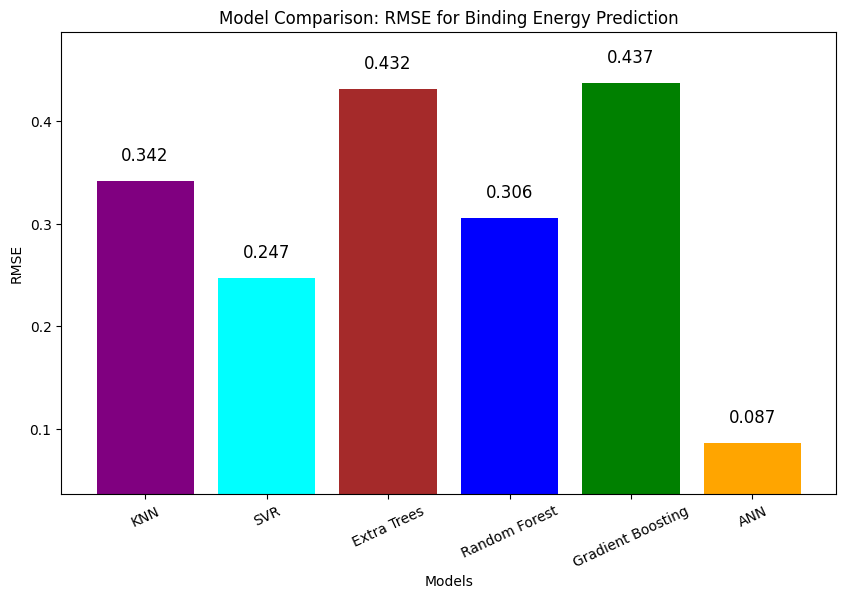

In [ ]:
import matplotlib.pyplot as plt

# Define model names
models = ['KNN', 'SVR', 'Extra Trees', 'Random Forest', 'Gradient Boosting',  'ANN']

# RMSE values (ensure these are defined earlier in your script)
rmse_values = [rmse_knn, rmse_svr, rmse_etr, rmse_rf, rmse_gbr,  rmse_ann[0]]

# Plot RMSE values
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color=['purple', 'cyan', 'brown', 'blue', 'green', 'orange', 'red'])
plt.xlabel("Models")
plt.ylabel("RMSE")
plt.title("Model Comparison: RMSE for Binding Energy Prediction")
plt.ylim(min(rmse_values) - 0.05, max(rmse_values) + 0.05)

# Annotate bars with RMSE values
for i, v in enumerate(rmse_values):
    plt.text(i, v + 0.02, f"{v:.3f}", ha='center', fontsize=12)

# Show the plot
plt.xticks(rotation=25)  # Rotate x-axis labels for better readability
plt.show()


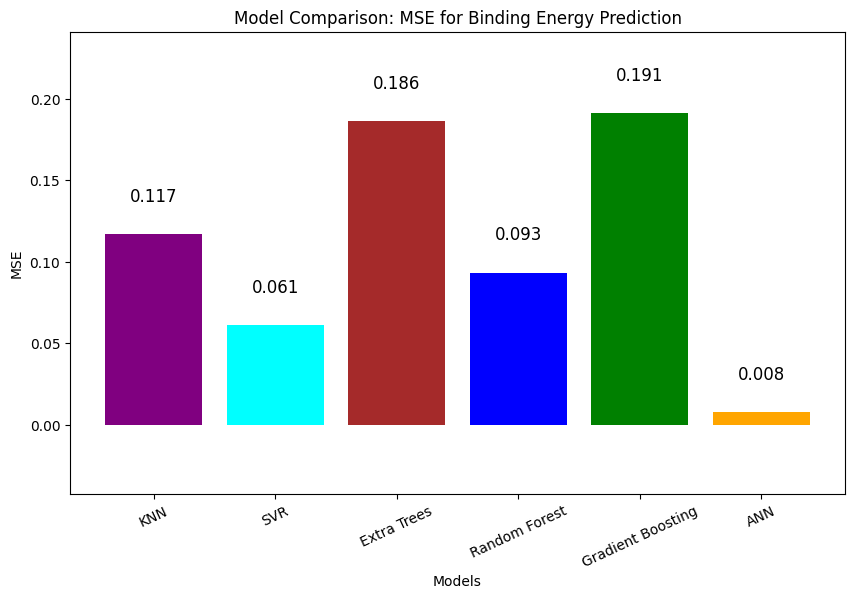

In [ ]:
import matplotlib.pyplot as plt

# Define model names
models = ['KNN', 'SVR', 'Extra Trees', 'Random Forest', 'Gradient Boosting',  'ANN']

# Compute MSE values by squaring the RMSE values
mse_values = [rmse ** 2 for rmse in [rmse_knn, rmse_svr, rmse_etr, rmse_rf, rmse_gbr,  rmse_ann[0]]]

# Plot MSE values
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=['purple', 'cyan', 'brown', 'blue', 'green', 'orange', 'red'])
plt.xlabel("Models")
plt.ylabel("MSE")
plt.title("Model Comparison: MSE for Binding Energy Prediction")
plt.ylim(min(mse_values) - 0.05, max(mse_values) + 0.05)

# Annotate bars with MSE values
for i, v in enumerate(mse_values):
    plt.text(i, v + 0.02, f"{v:.3f}", ha='center', fontsize=12)

# Show the plot
plt.xticks(rotation=25)  # Rotate x-axis labels for better readability
plt.show()
